In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


Support for third party widgets will remain active for the duration of the session. To disable support:

In [7]:
import chardet

In [8]:
df = pd.read_csv("/content/all_training.csv")
df.head()

,Unnamed: 0,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
0,A00345_2020-03-25,1.0,82.0,2.09,NaN,1.150,95.0,40.0,78.0,26.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,0
1,A00791_2020-03-19,1.0,51.0,1.97,237.0,0.970,54.0,98.0,98.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
2,A00741_2020-03-04,1.0,58.0,2.11,NaN,1.000,80.0,147.0,106.0,41.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,0
3,A00605_2020-04-15,0.0,82.0,2.27,138.0,0.755,123.5,176.5,106.0,114.0,...,9.5,1.7,0.9,3.60,2.60,0.7,0.1,0.1,0.5,0
4,A00417_2020-02-24,1.0,79.0,2.07,73.0,1.810,62.0,36.5,96.0,28.0,...,10.0,8.5,0.5,0.40,0.50,0.1,0.1,0.0,1.0,0


In [9]:
df[['ALT', 'LDH', 'PCR', 'KAL', 'NAT', 'UREA', 'WBC', 'RBC', 'HGB',
       'HCT', 'MCV', 'MCH', 'MCHC', 'PLT1', 'NE', 'LY']]

,ALT,LDH,PCR,KAL,NAT,UREA,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT1,NE,LY
0,21.0,307.0,61.90,4.16,144.00,29.0,9.9,3.820000,13.250000,38.50,100.850000,34.700000,34.45,200.500000,73.7,13.4
1,84.0,441.0,116.50,4.24,133.70,30.0,9.2,5.210000,14.900000,42.70,82.000000,28.600000,34.90,337.000000,NaN,NaN
2,36.0,359.0,86.65,3.94,139.30,NaN,6.7,4.905000,14.050000,41.35,84.300000,28.650000,34.00,200.000000,81.1,11.2
3,63.0,281.0,1.60,4.40,135.75,28.0,9.7,5.000000,14.500000,42.30,84.600000,29.000000,34.30,209.500000,51.4,36.5
4,38.5,264.0,317.50,4.41,139.20,66.0,1.0,2.906667,9.233333,28.60,98.433333,31.766667,32.30,55.333333,37.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,10.0,279.0,88.20,4.51,139.80,NaN,9.4,5.210000,13.700000,42.20,81.000000,26.300000,32.50,189.000000,NaN,NaN
1732,12.0,NaN,34.80,4.38,142.00,NaN,8.8,3.330000,12.000000,35.90,107.800000,36.000000,33.40,223.000000,NaN,NaN
1733,13.0,NaN,24.40,3.08,127.60,34.0,6.3,3.770000,11.300000,33.30,88.300000,30.000000,33.90,257.000000,NaN,NaN
1734,53.0,259.0,103.00,5.42,140.50,NaN,11.4,4.820000,13.900000,40.20,83.400000,28.800000,34.60,268.000000,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1736 non-null   object 
 1   Sex         1736 non-null   float64
 2   Age         1682 non-null   float64
 3   CA          1643 non-null   float64
 4   CK          704 non-null    float64
 5   CREA        1662 non-null   float64
 6   ALP         1262 non-null   float64
 7   GGT         1300 non-null   float64
 8   GLU         1638 non-null   float64
 9   AST         1638 non-null   float64
 10  ALT         1640 non-null   float64
 11  LDH         1433 non-null   float64
 12  PCR         1639 non-null   float64
 13  KAL         1656 non-null   float64
 14  NAT         1663 non-null   float64
 15  UREA        1060 non-null   float64
 16  WBC         1673 non-null   float64
 17  RBC         1673 non-null   float64
 18  HGB         1673 non-null   float64
 19  HCT         1673 non-null  

In [11]:
df.rename(columns={'Unnamed: 0': 'Patient_id'}, inplace=True)
df = df.drop(columns="Patient_id")

In [12]:
df.isnull().sum()

Sex           0
Age          54
CA           93
CK         1032
CREA         74
ALP         474
GGT         436
GLU          98
AST          98
ALT          96
LDH         303
PCR          97
KAL          80
NAT          73
UREA        676
WBC          63
RBC          63
HGB          63
HCT          63
MCV          63
MCH          63
MCHC         63
PLT1         63
NE          362
LY          362
MO          362
EO          362
BA          362
NET         362
LYT         362
MOT         362
EOT         362
BAT         362
Suspect       0
target        0
dtype: int64

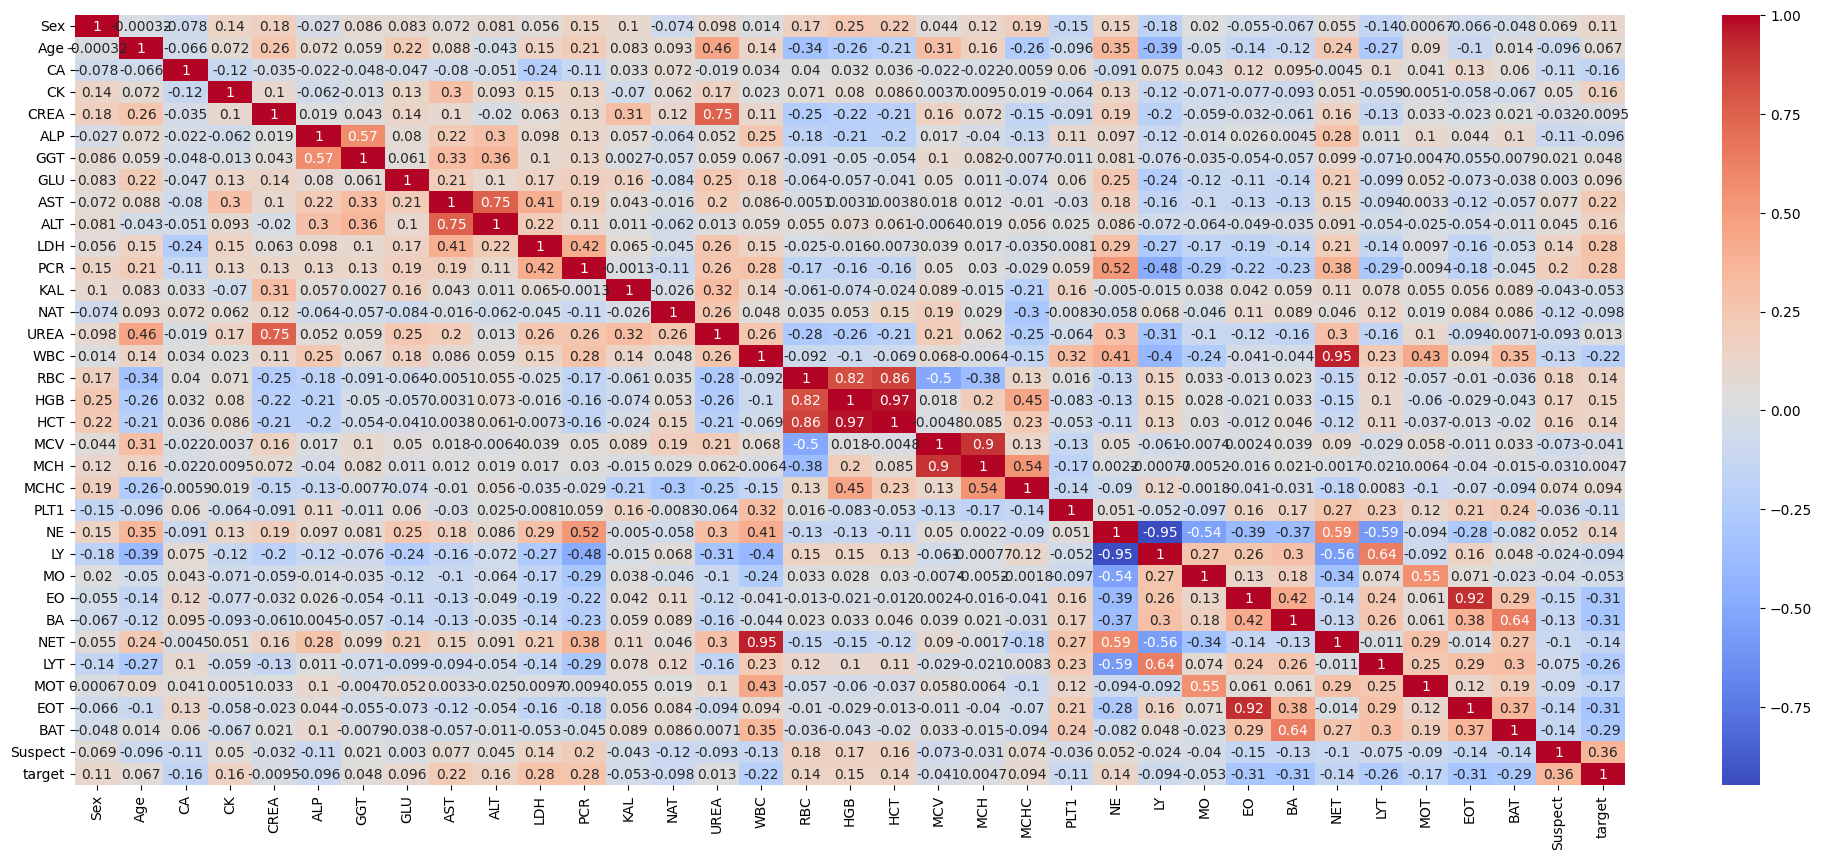

In [13]:
# prompt: give more visualize to analyse the dataset

import matplotlib.pyplot as plt
# Analyze the correlation between numerical columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()



In [14]:
# df.fillna(df.mean(), inplace=True)

# print(df)

# df = df.bfill()
df = df.ffill()
for column in df.columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


print(df.isnull().sum())
df

Sex        0
Age        0
CA         0
CK         0
CREA       0
ALP        0
GGT        0
GLU        0
AST        0
ALT        0
LDH        0
PCR        0
KAL        0
NAT        0
UREA       0
WBC        0
RBC        0
HGB        0
HCT        0
MCV        0
MCH        0
MCHC       0
PLT1       0
NE         0
LY         0
MO         0
EO         0
BA         0
NET        0
LYT        0
MOT        0
EOT        0
BAT        0
Suspect    0
target     0
dtype: int64


,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
0,1.0,82.0,2.09,165.145426,1.150,95.0,40.0,78.0,26.0,21.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,0
1,1.0,51.0,1.97,237.000000,0.970,54.0,98.0,98.0,74.0,84.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,1
2,1.0,58.0,2.11,237.000000,1.000,80.0,147.0,106.0,41.0,36.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,0
3,0.0,82.0,2.27,138.000000,0.755,123.5,176.5,106.0,114.0,63.0,...,9.5,1.7,0.9,3.60,2.60,0.7,0.1,0.1,0.5,0
4,1.0,79.0,2.07,73.000000,1.810,62.0,36.5,96.0,28.0,38.5,...,10.0,8.5,0.5,0.40,0.50,0.1,0.1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,78.0,2.38,40.000000,0.800,68.0,9.0,128.0,13.0,10.0,...,7.2,0.4,0.3,7.50,0.90,0.7,0.0,0.0,1.0,0
1732,0.0,78.0,2.36,40.000000,0.960,79.0,35.0,107.0,24.0,12.0,...,7.2,0.4,0.3,7.50,0.90,0.7,0.0,0.0,1.0,0
1733,1.0,78.0,2.28,40.000000,1.420,79.0,35.0,136.0,53.0,13.0,...,7.2,0.4,0.3,7.50,0.90,0.7,0.0,0.0,1.0,0
1734,1.0,78.0,2.40,124.000000,0.950,48.0,44.0,95.0,50.0,53.0,...,7.2,0.4,0.3,7.50,0.90,0.7,0.0,0.0,1.0,0


<ipython-input-15-95ab82567afa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_features.columns, rotation=45, ha='right')


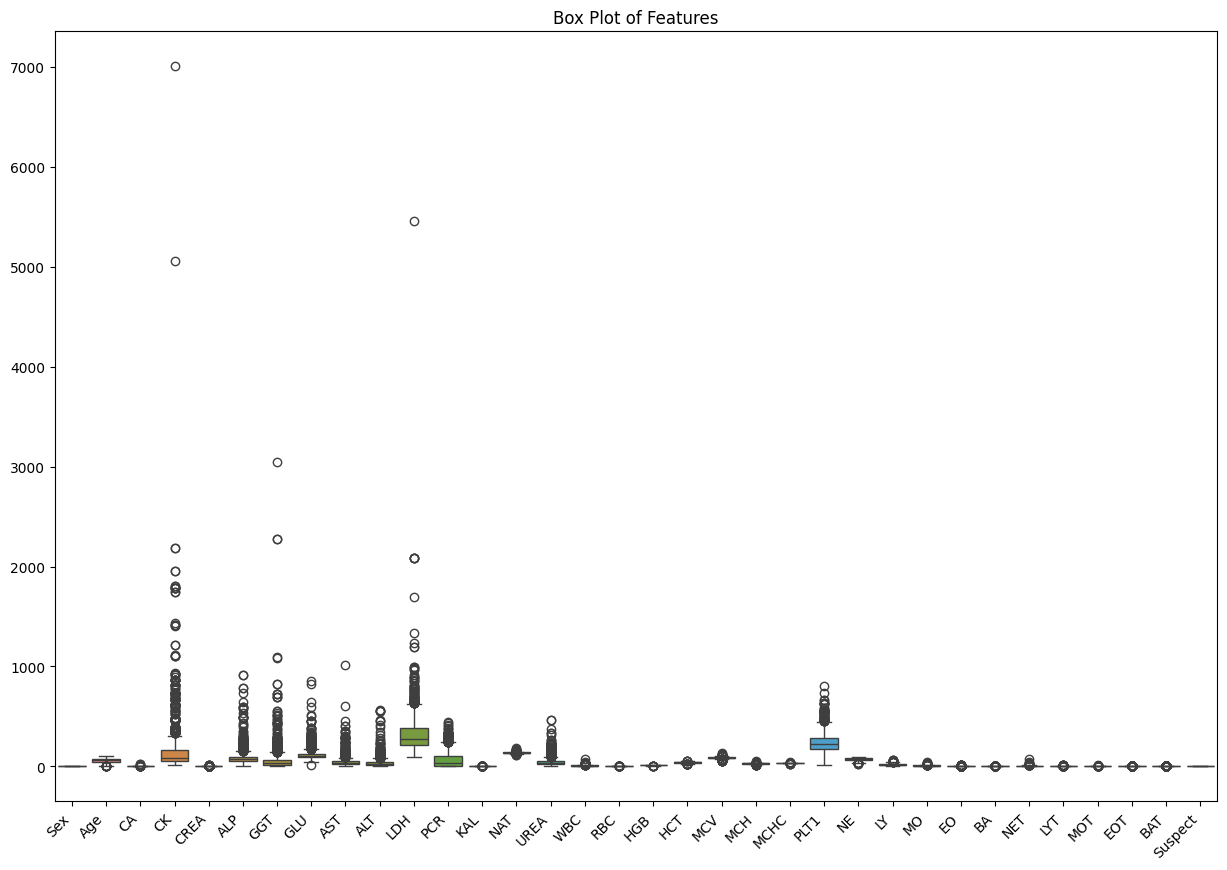

In [15]:
# prompt: give me the box plot of the dataset the target is target

import matplotlib.pyplot as plt
df_target = df['target']
df_features = df.drop('target', axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=df_features, ax=ax)
ax.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax.set_title('Box Plot of Features')
plt.show()


In [16]:
# prompt: in the box plot ck, ldh, ggt have the more error drop the values which is above 3000

df = df.drop(df.loc[(df['CK'] > 3100) | (df['LDH'] > 2950) | (df['GGT'] > 3000)].index)


<ipython-input-17-95ab82567afa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_features.columns, rotation=45, ha='right')


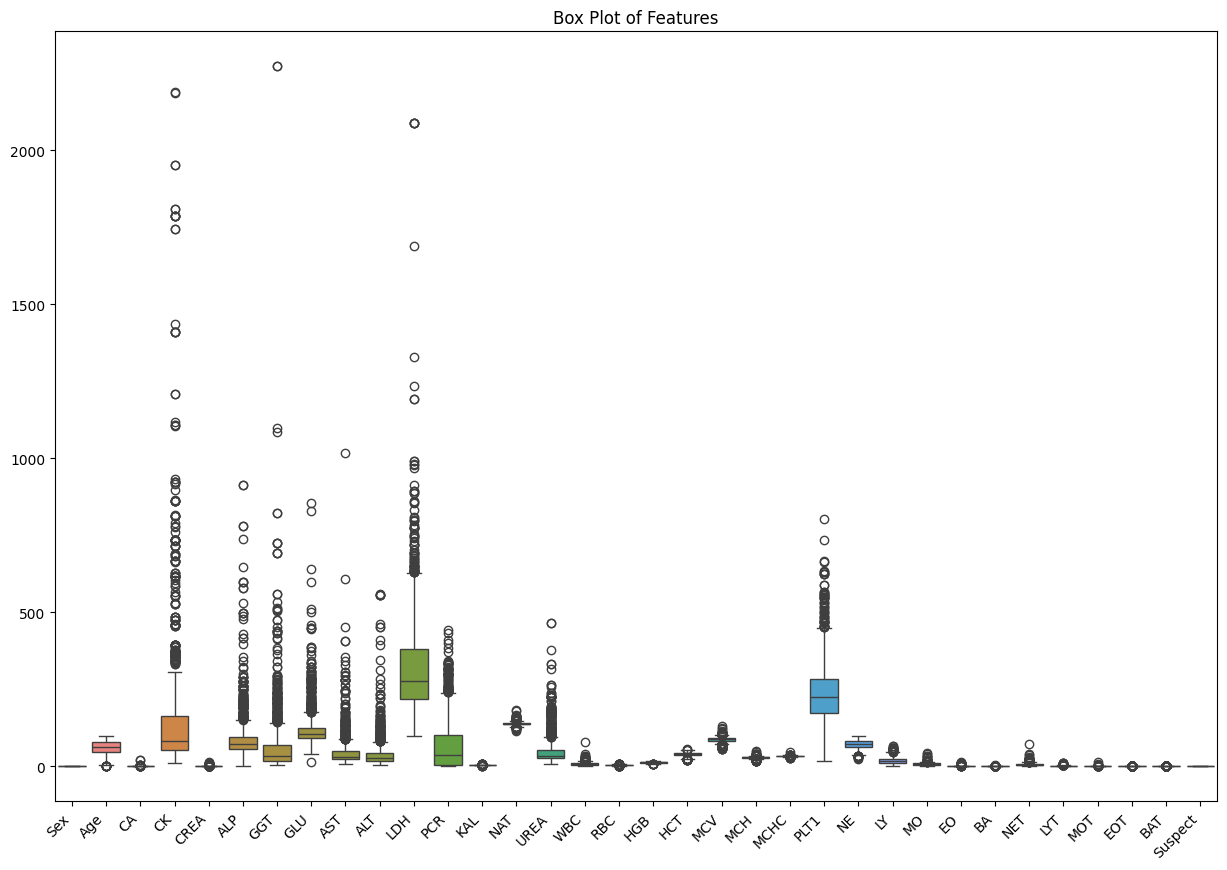

In [17]:
# prompt: give me the box plot of the dataset the target is target

import matplotlib.pyplot as plt
df_target = df['target']
df_features = df.drop('target', axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=df_features, ax=ax)
ax.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax.set_title('Box Plot of Features')
plt.show()


In [18]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[LightGBM] [Info] Number of positive: 645, number of negative: 740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5737
[LightGBM] [Info] Number of data points in the train set: 1385, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465704 -> initscore=-0.137400
[LightGBM] [Info] Start training from score -0.137400
Accuracy: 0.7780979827089337


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       178
           1       0.82      0.69      0.75       169

    accuracy                           0.78       347
   macro avg       0.79      0.78      0.78       347
weighted avg       0.78      0.78      0.78       347

Confusion Matrix:
[[153  25]
 [ 52 117]]


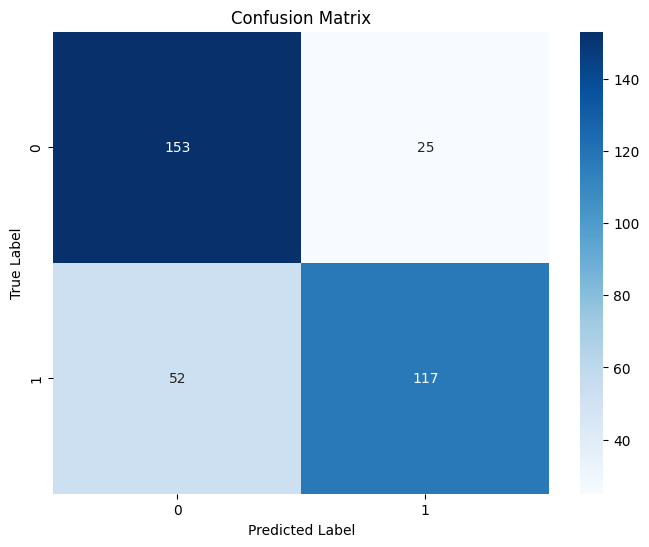

In [21]:

import matplotlib.pyplot as plt
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
